Step -1- Data Understanding, Analysis and Preparations:

In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [32]:
data = pd.read_csv("/content/drive/MyDrive/Concept and Technology of AI/Houseprice.csv")
data.head()

,HouseAge,HouseFloor,HouseArea,HousePrice
0,52,2,112.945574,543917.179841
1,93,1,174.312126,817740.124828
2,15,4,125.219577,387992.503019
3,72,4,121.210124,240840.742388
4,61,4,59.221737,277273.386525


In [33]:
X = data[['HouseAge', 'HouseFloor', 'HouseArea']].values
y = data['HousePrice'].values.reshape(-1, 1)

• To - Do - 3:
1. Split the dataset into training and test sets.
2. You can use an 80-20 or 70-30 split, with 80% (or 70%) of the data used for training and the rest
for testing.

In [34]:
def train_test_split(X, y, test_size=0.2):
    split_index = int(len(X) * (1 - test_size))
    return X[:split_index], X[split_index:], y[:split_index], y[split_index:]

X_train, X_test, y_train, y_test = train_test_split(X, y)

In [35]:
def standardize(X):
    mean = np.mean(X, axis=0)
    std = np.std(X, axis=0)
    return (X - mean) / std, mean, std

X_train, mean, std = standardize(X_train)
X_test = (X_test - mean) / std

In [36]:
def add_bias(X):
    return np.c_[np.ones((X.shape[0], 1)), X]

X_train = add_bias(X_train)
X_test = add_bias(X_test)

Step -2- Build a Cost Function:

In [37]:
def compute_cost(X, y, W):
    m = len(y)
    predictions = X @ W
    cost = (1 / (2 * m)) * np.sum((predictions - y) ** 2)
    return cost

Gradient Descent for Simple Linear Regression:

In [38]:
def gradient_descent(X, y, learning_rate=0.01, iterations=1000):
    m, n = X.shape
    W = np.zeros((n, 1))
    cost_history = []

    for _ in range(iterations):
        gradients = (1 / m) * X.T @ (X @ W - y)
        W -= learning_rate * gradients
        cost_history.append(compute_cost(X, y, W))

    return W, cost_history

Algorithm Steps
1. Initialize the parameters w (and b, if needed) to small random values or zeros.
2. Set the learning rate α and define a stopping criterion (such as a maximum number of iterations or a
convergence threshold).
3. Repeat the following steps until convergence:
(a) Compute the predicted values

(b) Compute the loss function

(c) Compute the gradient Loss

(d) Update the weights using the Gradient Descent update rule.

In [39]:
learning_rate = 0.01
iterations = 1000

W_optimal, cost_history = gradient_descent(
    X_train, y_train, learning_rate, iterations
)

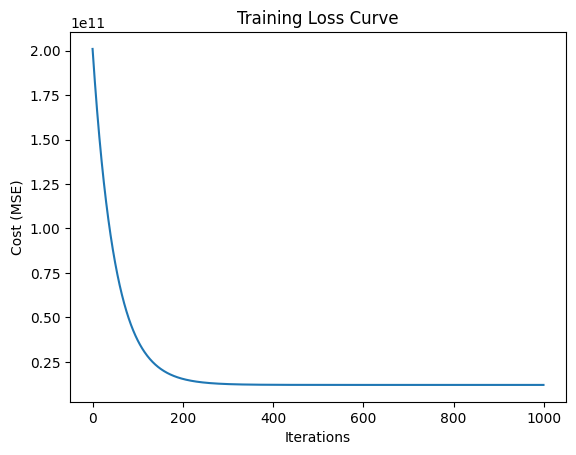

In [40]:
plt.plot(cost_history)
plt.xlabel("Iterations")
plt.ylabel("Cost (MSE)")
plt.title("Training Loss Curve")
plt.show()

Plot Cost vs Iterations

In [41]:
def predict(X, W):
    return X @ W

In [42]:
y_pred = predict(X_test, W_optimal)

Evaluation Metrics (RMSE & R²)

In [43]:
def rmse(y_true, y_pred):
    return np.sqrt(np.mean((y_true - y_pred) ** 2))

def r2(y_true, y_pred):
    ss_total = np.sum((y_true - np.mean(y_true)) ** 2)
    ss_residual = np.sum((y_true - y_pred) ** 2)
    return 1 - (ss_residual / ss_total)

In [44]:
model_rmse = rmse(y_test, y_pred)
model_r2 = r2(y_test, y_pred)

print("Final Weights:\n", W_optimal)
print("RMSE on Test Set:", model_rmse)
print("R-Squared on Test Set:", model_r2)

Final Weights:
 [[583460.10120221]
 [-12501.47127838]
 [-32390.84737944]
 [205133.37981903]]
RMSE on Test Set: 129209.1335573418
R-Squared on Test Set: 0.72693072558136
